In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import geoCosiCorr3D
import geoCosiCorr3D.georoutines.geo_utils as geo_utils
import geoCosiCorr3D.georoutines.geoplt_misc as geo_plt
import geoCosiCorr3D.time_series.geoICA as geoICA
import matplotlib.gridspec as gridspec

from pathlib import Path
print(geoCosiCorr3D.__version__)
cmap = "RdYlBu"

2.5.3


In [2]:

def plt_4_bands(raster_info: geo_utils.cRasterInfo,
               o_folder=None,
               arg=None,
               off=2.5):
    fig = plt.figure(figsize=(19.20, 10.80))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)
    off = off
    axList = []
    imList = []

    for index, array_ in enumerate(raster_info.raster_array):
        ax = fig.add_subplot(spec[0, index])  # ,projection=ccrs.Mercator())
        axList.append(ax)
        array_ = np.ma.masked_where(array_ < -100, array_)
        array_ = np.ma.masked_where(array_ > 100, array_)

        im = ax.imshow(array_, cmap=cmap, vmin=-off, vmax=off)
        imList.append(im)

        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    geo_plt.ColorBar_(ax=axList[-1], mapobj=imList[-1], size=12, vmin=-off, vmax=off,
                      cmap='RdBlu')  # ticks=[-off, 0,  off], width="3%")
    if o_folder != None:
        svgPath = os.path.join(o_folder, arg + ".svg")
        fig.savefig(svgPath, transparent=False, format="svg", dpi=600)
    else:
        plt.show()

## Aliasing artifacts, combining Spot-6 and WV images
#### Study area: Ridgecrest, California

### 1| Import data

In [3]:
path = "dataset"
ew_fn = os.path.join(path, "EW_WV_Spot_MB_3DDA.tif")
ns_fn = os.path.join(path, "NS_WV_Spot_MB_3DDA.tif")
window = [438404.668, 3956432.6313, 449235.1422, 3965948.5889]
# dzPath = os.path.join(path, "Dz_WV_Spot_MB_3DDA_det")

### 2| EW component

In [4]:
ew_ica = geoICA.geoICA(ew_fn, 4)
ew_ica()


<< EW_WV_Spot_MB_3DDA_geoICA >> folder already exist type y to delete and recreate new one or type n :  
Successfully created the directory <<dataset/EW_WV_Spot_MB_3DDA_geoICA>> 
Valid values: 1499317:1899710 ===> invalid:400393
input_array dim:(1899710, 4)
masked array dim:(1499317, 4)
U: (1499317, 4) S: (4,) Vt: (4, 4)
{'algorithm': 'parallel', 'fun': 'exp', 'fun_args': None, 'max_iter': 1000, 'n_components': 4, 'random_state': None, 'tol': 0.0001, 'w_init': None, 'whiten': 'unit-variance', 'whiten_solver': 'svd'}


Extracting components:   0%|          | 0/4 [00:00<?, ?it/s]

===> IC:1
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma 2.4255730215108816e-06 0.9999999728892544
RMSE= 1.000
max= 34.269 min= -35.372 std= 1.000 mean= 0.000 median -0.008 mad= 0.086 nmad= 0.128
CE68= (-0.9944554306762368, 0.9944602818222803) CE90= (-1.644851156785243, 1.6448560079312855) CE95= (-1.9599615058309474, 1.9599663569769905) CE99= (-2.575826808143226, 2.575831659289269)


Extracting components:  25%|██▌       | 1/4 [00:00<00:01,  2.30it/s]

===> IC:2
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma 2.372693178622142e-06 0.9999999505433989
RMSE= 1.000
max= 60.762 min= -49.029 std= 1.000 mean= 0.000 median -0.011 mad= 0.054 nmad= 0.081
CE68= (-0.9944554613340676, 0.9944602067204252) CE90= (-1.6448511729094244, 1.644855918295781) CE95= (-1.9599615149137184, 1.9599662603000756) CE99= (-2.575826803463959, 2.5758315488503167)


Extracting components:  50%|█████     | 2/4 [00:00<00:00,  2.47it/s]

===> IC:3
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma -2.0664900400332765e-07 0.999999998341007
RMSE= 1.000
max= 35.917 min= -33.600 std= 1.000 mean= -0.000 median -0.003 mad= 0.091 nmad= 0.135
CE68= (-0.9944580882089583, 0.9944576749109507) CE90= (-1.644853830871676, 1.6448534175736675) CE95= (-1.9599641879374914, 1.9599637746394836) CE99= (-2.5758295059246215, 2.575829092626613)


Extracting components:  75%|███████▌  | 3/4 [00:01<00:00,  2.47it/s]

===> IC:4
Valid values:1499317 :1899710 ===> invalid:400393
mu, sigma -4.744774121293252e-07 1.0000000645847575
RMSE= 1.000
max= 17.932 min= -18.229 std= 1.000 mean= -0.000 median 0.148 mad= 0.722 nmad= 1.070
CE68= (-0.9944584219139865, 0.9944574729591626) CE90= (-1.6448542076613575, 1.6448532587065328) CE95= (-1.9599645856012649, 1.9599636366464408) CE99= (-2.5758299443856236, 2.5758289954307996)


Extracting components: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]
ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:   0%|          | 0/4 [00:00<?, ?it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  25%|██▌       | 1/4 [00:00<00:01,  1.79it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Reconstructed component 0 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_0.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  50%|█████     | 2/4 [00:01<00:01,  1.92it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Reconstructed component 1 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_1.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction:  75%|███████▌  | 3/4 [00:01<00:00,  1.95it/s]ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed


Reconstructed component 2 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_2.tif
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393
Valid values:1499317 :1899710 ===> invalid:400393


ERROR 1: PROJ: proj_create_from_database: Open of /home/saif/miniconda3/envs/geoCosiCorr3D/share/proj failed
Data reconstruction: 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

Reconstructed component 3 saved to dataset/EW_WV_Spot_MB_3DDA_geoICA/EW_WV_Spot_MB_3DDA_mean_geoICA_Rec_IC_3.tif


#### 2.1| EW: plot observations

Plotting input EW: 


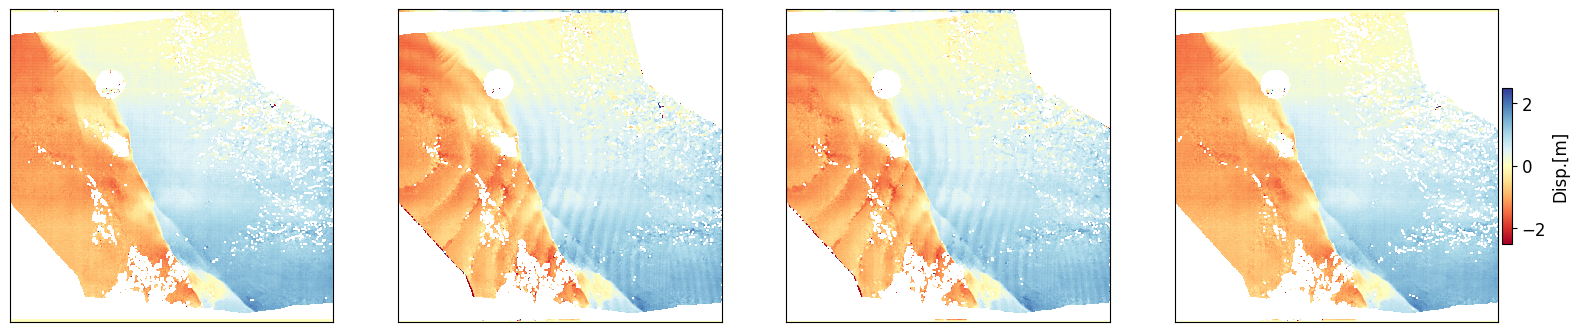

In [5]:
print("Plotting input EW: ")
plt_4_bands(raster_info=ew_ica.raster_info, arg="EW_orig_Disp")

#### 2.3| EW: ICA decomposition and reconstruction

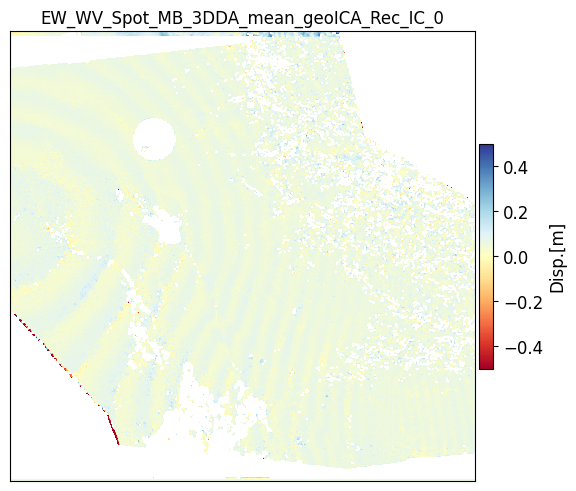

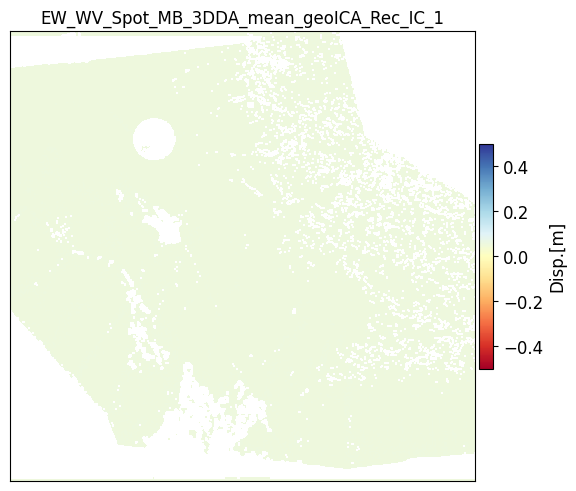

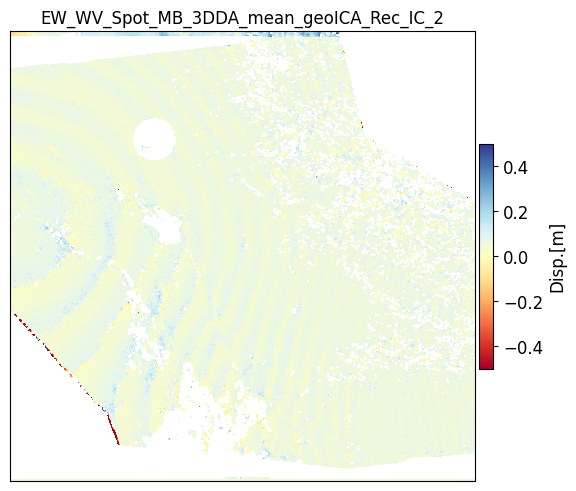

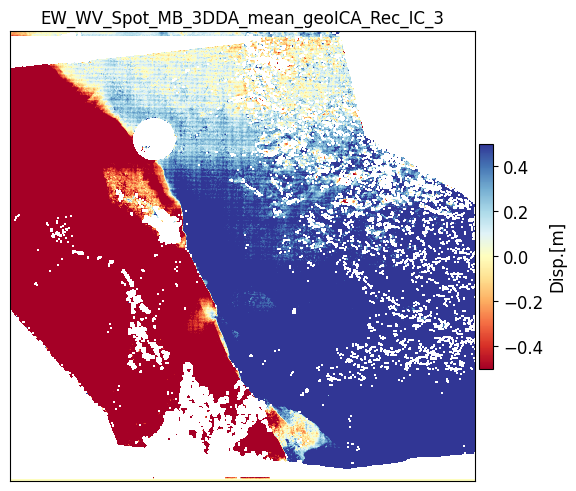

In [6]:
off = 0.5
for mean_rec_fn in ew_ica.mean_reconstructed_fns:
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
    mapobj = ax1.imshow(np.ma.masked_invalid(geo_utils.cRasterInfo(mean_rec_fn).raster_array[0]),
                        vmin=-off, vmax=off, cmap="RdYlBu")
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    geo_plt.ColorBar_(ax=ax1, mapobj=mapobj, size=12, vmin=-off, vmax=off, cmap='RdBlu')
    ax1.set_title(Path(mean_rec_fn).stem)
plt.show()


##### 2.3.3| EW: Residuals